[Home](home.ipynb) > Perception biases in networks with Homophily and Preferential Attachment

<img style='float: left;' src='https://www.gesis.org/fileadmin/styles/img/gs_home_logo_en.svg'>

### *Notebooks for Social Network Analysis*

# Perception biases in networks with homophily and group sizes

Author: [Fariba Karimi](https://www.gesis.org/person/fariba.karimi)

Version: 0.1 (21.01.2020)

Please cite as: Karimi, Fariba (2020). Perception biases in networks with homophily and group sizes. *Notebooks for Social Network Analysis*. GESIS. url:xxx

<div class="alert alert-info">
<big><b>Significance</b></big>

People’s perceptions about the size of minority groups in social networks can be biased, often showing systematic over- or
underestimation. These social perception biases are often attributed to biased cognitive or motivational processes. Here we
show that both over- and underestimation of the size of a minority group can emerge solely from structural properties of social
networks. Using a generative network model, we show that these biases depend on the level of homophily, its asymmetric
nature and on the size of the minority group. Our model predictions correspond well with empirical data from a cross-cultural
survey and with numerical calculations from six real-world networks. We also identify circumstances under which individuals
can reduce their biases by relying on perceptions of their neighbours. 
</div>

### For more information, please visit the following paper


<img style='float: left;'
src='images/NHB_karimi.png' width='700' height='700' >



## Introduction

People’s perceptions of their social worlds determine their own
personal aspirations1 and willingness to engage in different
behaviours, from voting and energy conservation to health
behaviour, drinking and smoking. Yet, when forming these perceptions,
people seldom have an opportunity to draw representative
samples from the overall social network, or from the general
population. Instead, their samples are constrained by the local
structure of their personal networks, which can bias their perception
of the relative frequency of different attributes in the general
population. For example, supporters of different candidates in the
2016 US presidential election formed relatively isolated Twitter
communities. Such insular communities can overestimate the relative
frequency of their own attributes in the overall society. This
has been documented in the literature on overestimation effects
including *false consensus*, looking-glass perception and, more generally,
social projection. In an apparent contradiction, it has also
been documented that people holding a particular view sometimes
underestimate the frequency of that view, as described in the literature
on *false uniqueness*, pluralistic ignorance and majority
illusion. These over- and underestimation errors, which we call
social perception biases, affect people’s judgements of minority- and
majority-group sizes.

In this study, we show empirically, analytically and numerically that a
simple network model can explain both over- and underestimation
in social perceptions, without assuming biased motivational or cognitive
processes.


At the individual level, we assume that individuals’ perceptions
are based on the frequency of an attribute in their personal networks
(their direct neighbourhoods). We define individual i’s social
perception bias as follows:

\begin{equation}
    B_{indv,i}=1/f_{m}\frac{\sum_{j\in\delta}{ x_j}}{k_i},
\end{equation}


where $f_m$ denotes the fraction of minority in the whole network, $\delta$ is the set of $i$'s neighbors, and $k_i$ is the degree of $i$. The group perdception bias is the average perception over all the members of the group. 

Figure below describes the concept of the perception bias. The blue node $i$ in the center tends to underestimate the size of the minority nodes (orange nodes) in the homophilic networks and overestimate the size of the minority nodes in the heterophilic network:


<img style='float: left;'
src='perception_bias/images/Fig1.png' width='500' height='500' >


**In this notebook**, I provide an intuitive walk through the construction of the perception biases in homophilic-preferential attachment network Model (BA-Homophily model). For constructing the BA-Homophily model, please check the other notebook. 


## Dependencies and Settings

In [2]:
%matplotlib inline

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

## Model

``homophilic_ba_graph(N,m,min_fraction,homophily)`` is the main function to generate the network. This function can be called from ``generate_homophilic_graph_symmetric.py``. 

After generating the BA-Homophily model, we can measure the perception bias of each node by iterating over each node and calculating the perception bias. Finally, we average the perception bias across each group to calculate the group perception bias. The results are averaged over 20 independet simulations and stored at ``perception_bias/images/Fig2``. 



### Draw the perception bias versus homophily and minority size

Here we plot perception bias of the minority and the majority group versus homophily and group sizes. 

/usr/local/lib/python3.4/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


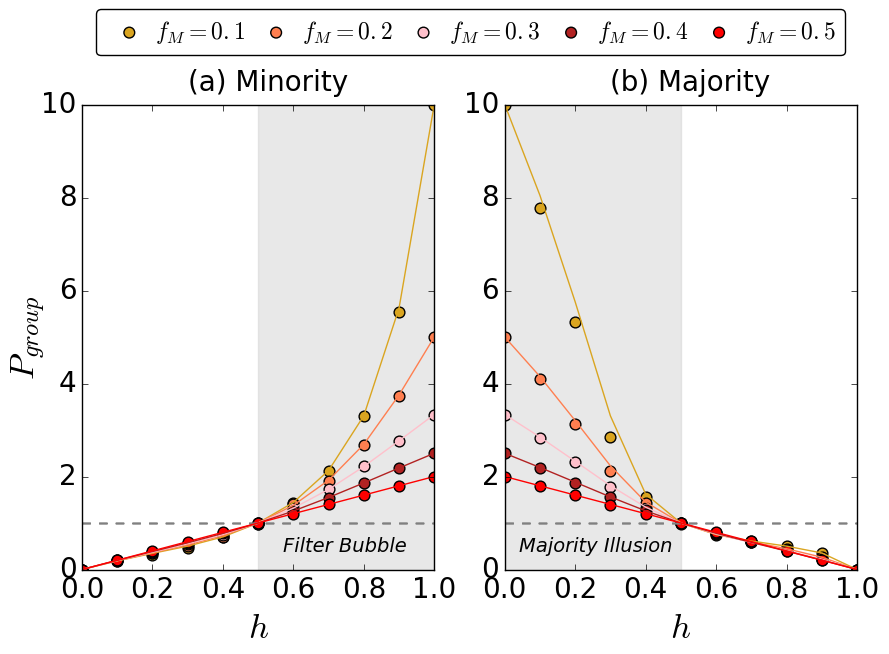

In [5]:


plt.rcParams["font.family"] = "sans-serif"


fminor_list = [0.1, 0.2, 0.3, 0.4, 0.5]
fig = plt.figure(figsize = (10,6))
ha = [i/10. for i in range(11)]
hb = [1.-temp_h for temp_h in ha]
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axvspan(0.5,1.0,color='lightgrey', edgecolor = 'lightgrey', alpha=0.5)
ax2.axvspan(0.0,0.5, color='lightgrey', edgecolor = 'lightgrey', alpha=0.5)
cmap = ['Goldenrod', 'coral', 'Pink', 'Firebrick', 'Red']
for fi in range(len(fminor_list)) : 
    fminor = fminor_list[fi]
   
    ''' Initial data'''
    Cdata = np.loadtxt('perception_bias/images/Fig2/ctest_fa%s.txt' %(fminor))
    fa = fminor 
    fb = 1.-fminor 
    
    minor_data = np.loadtxt('perception_bias/images/Fig2/neterr_minor_fa%s.txt' %(fminor))
    major_data = np.loadtxt('perception_bias/images/Fig2/neterr_major_fa%s.txt' %(fminor))
    c = Cdata[:,1]

    ''' Fig1(a) for the minority'''
    minorh = minor_data[:,0]
    minor_neterr = minor_data[:,1]
    minor_analytic_y = [2*((fa*ha[temp_c])/(ha[temp_c]*c[temp_c]+hb[temp_c]*(2.-c[temp_c])) )/fa for temp_c in range(len(c))]
    norm_minor_neterr = [(merr+fminor)/fminor for merr in minor_neterr]
    ax1.axhline(y=1, color = 'grey', ls = 'dashed')
    ax1.scatter(minorh, norm_minor_neterr, marker = 'o', edgecolor = 'black', s= 60,label = '$f_M=%s$' %fminor, facecolor = cmap[fi], zorder = 2)
    ax1.plot(minorh, minor_analytic_y, label = '',color = cmap[fi])
    ax1.set_xlabel(r'$h$', fontsize = 25)
    ax1.set_ylabel(r'$P_{group}$', fontsize = 25,labelpad = -5)
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.yaxis.set_tick_params(labelsize=20)
    ax1.set_xlim([0.0,1.0])
    ax1.set_ylim([0.0,10.0])
    

    

    ''' Fig1(b) for the majority'''
    majorh = major_data[:,0]
    major_neterr = major_data[:,1]
    major_analytic_y = [((fa*hb[temp_c])/(ha[temp_c]*c[temp_c]+hb[temp_c]*(2.-c[temp_c])) + ((c[temp_c]/(2.-c[temp_c]))*(fb*hb[temp_c])/(hb[temp_c]*c[temp_c]+ha[temp_c]*(2.-c[temp_c]))))/ (fa) for temp_c in range(len(c))]
    norm_major_neterr = [(mjerr+fminor)/fminor for mjerr in major_neterr]
    ax2.axhline(y=1, color = 'grey', ls = 'dashed')
    ax2.scatter(majorh, norm_major_neterr, marker = 'o', s = 60, edgecolor = 'black', label = '$f_M=%s$' %fminor, color = cmap[fi], zorder = 2)
    ax2.plot(majorh, major_analytic_y, label = '',color = cmap[fi])
    ax2.set_xlabel(r'$h$', fontsize = 25)
    ax2.xaxis.set_tick_params(labelsize=20)
    ax2.yaxis.set_tick_params(labelsize=20)
    ax2.set_xlim(0.0,1.0)
    ax2.set_ylim(0.0,10.0)
    

    
''' Set labels ''' 
ax1.text(0.3,10.3, '(a) Minority',fontsize = 20)
ax2.text(0.3,10.3,'(b) Majority', fontsize = 20)

ax1.text(0.57,0.4, 'Filter Bubble',fontsize = 14,style='italic')
ax2.text(0.04,0.4, 'Majority Illusion',fontsize = 14,style='italic')

ax1.legend(scatterpoints=1, fontsize =17,bbox_to_anchor=(2.2, 1.23), fancybox=True, ncol=5, handletextpad=0.1,columnspacing=0.3)


#fig.savefig('Fig2.pdf', bbox_inches = 'tight')
plt.show()


### Reducing the perception bias by asking the neighbors

To what extent and under what structural conditions can individuals reduce their perception
bias? To address this question, we consider perception biases of
individuals and their neighbours. We aggregated each individual’s
own perception of frequency of different attributes (ego) with the
averaged perceptions of the individual’s neighbours. This is similar to *DeGroot’s weighted belief formalization*.

#### Degree growth of the minority and the majority (comparing analytical and numerical analysis)

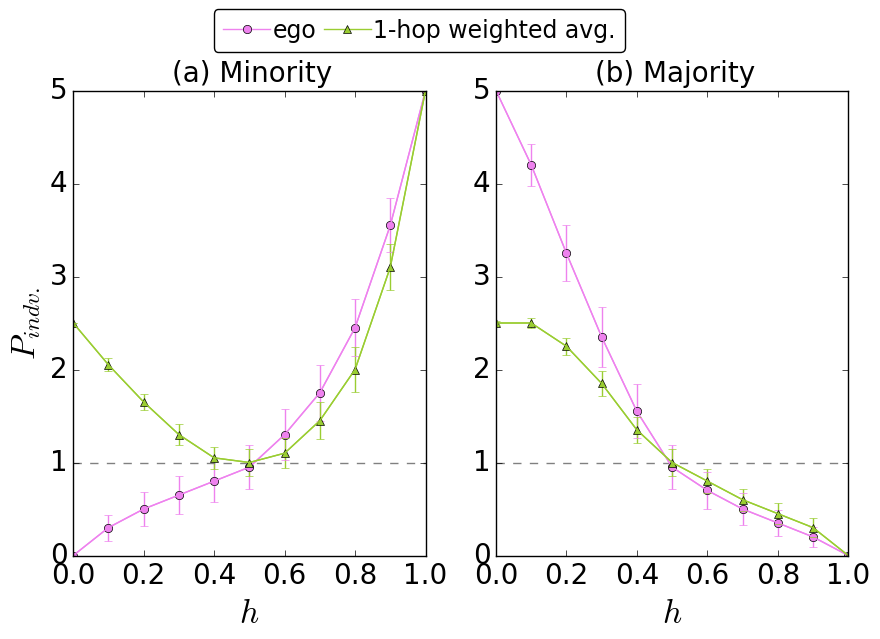

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import os, sys, inspect
import math

plt.rcParams["font.family"] = "sans-serif"

fminor_list = [0.2]

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


cmap = [ 'violet','yellowgreen']
for fi in range(len(fminor_list)) : 

    fminor = fminor_list[fi]
    fa = fminor 
    fb = 1.-fminor 

    minor_data = np.loadtxt('perception_bias/images/Fig5/0hop_neterr_minor_fa%s.txt' %(fminor))
    major_data = np.loadtxt('perception_bias/images/Fig5/0hop_neterr_major_fa%s.txt' %(fminor))

    minorh = minor_data[:,0]
    minor_neterr = minor_data[:,1]
    minor_neterr_std = minor_data[:,2]

    hop_minor_data = np.loadtxt('perception_bias/images/Fig5/1.0_hop_neterr_minor_fa%s_avg_sum.txt' %(fminor))
    hop_major_data = np.loadtxt('perception_bias/images/Fig5/1.0_hop_neterr_major_fa%s_avg_sum.txt' %(fminor))

    hop_y_min_mean = hop_minor_data[:,1]
    hop_y_min_std = hop_minor_data[:,2]

    '''Fig.5(a) for the minority ''' 
    ax1.axhline(y= 1, color = 'grey', ls = 'dashed')
    ax1.plot(minorh, (minor_neterr)/fminor, marker = 'o', label = 'ego', color = cmap[0] , mec = 'black')
    ax1.errorbar(minorh, (minor_neterr)/fminor, yerr = minor_neterr_std,  color = cmap[0] )
    ax1.plot(minorh, (hop_y_min_mean)/fminor  , marker = '^', label = '1-hop weighted avg.' , color = cmap[1] , mec = 'black')
    ax1.errorbar(minorh, (hop_y_min_mean)/fminor, yerr= hop_y_min_std  ,  color = cmap[1] )
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.yaxis.set_tick_params(labelsize=20)
    ax1.set_xlabel(r'$h$', fontsize = 24)
    ax1.set_ylabel(r'$P_{indv.}$', fontsize = 24)
    ax1.legend(numpoints = 1, loc = 'best' ,fontsize = 20)



    '''Fig.5(b) for the majority'''     
    hop_y_maj_mean = hop_major_data[:,1]
    hop_y_maj_std = hop_major_data[:,2]
    majorh = major_data[:,0]
    major_neterr = major_data[:,1]
    major_neterr_std = major_data[:,2]
    ax2.axhline(y= 1, color = 'grey', ls = 'dashed')
    ax2.plot(majorh, (major_neterr)/fminor , marker = 'o', label = 'ego' , color = cmap[0] , mec = 'black')
    ax2.errorbar(minorh, (major_neterr)/fminor, yerr = major_neterr_std,  color = cmap[0] )
    ax2.plot(majorh, (hop_y_maj_mean)/fminor , marker = '^', label = '1-hop weighted avg.' , color = cmap[1] , mec = 'black')
    ax2.errorbar(minorh, (hop_y_maj_mean)/fminor, yerr = hop_y_maj_std,  color = cmap[1] )
    ax2.set_xlabel(r'$h$', fontsize = 24)
    ax2.xaxis.set_tick_params(labelsize=20)
    ax2.yaxis.set_tick_params(labelsize=20)

    

ax1.xaxis.set_ticks(np.arange(0, 1.2, 0.2))
ax2.xaxis.set_ticks(np.arange(0, 1.2, 0.2))

ax1.text(0.28,5.1, '(a) Minority',fontsize = 20)
ax2.text(0.28,5.1, '(b) Majority',fontsize = 20)

ax1.legend(numpoints=1, fontsize =17,bbox_to_anchor=(1.6, 1.2), fancybox=True, ncol=5, handletextpad=0.1,columnspacing=0.3)

plt.show()
#plt.savefig('Fig5.pdf', bbox_inches = 'tight')


## Acknowledgments

The code for plotting perception biases are written by Dr. [Eun Lee](https://www.eunlee.net/).



## Literature
Lee, E., Karimi, F., Wagner, C., Jo, H. H., Strohmaier, M., & Galesic, M. (2019). Homophily and minority-group size explain perception biases in social networks. Nature human behaviour, 3(10), 1078-1087.

Karimi, F., Génois, M., Wagner, C., Singer, P., & Strohmaier, M. (2018). Homophily influences ranking of minorities in social networks. Scientific reports, 8(1), 1-12.(https://www.nature.com/articles/s41598-018-29405-7)

DeGroot, M. H. (1974). Reaching a consensus. Journal of the American Statistical Association, 69(345), 118-121.

Centola, D. (2011). An experimental study of homophily in the adoption of health behavior. Science, 334(6060), 1269-1272.

Galesic, M., de Bruin, W. B., Dumas, M., Kapteyn, A., Darling, J. E., & Meijer, E. (2018). Asking about social circles improves election predictions. Nature Human Behaviour, 2(3), 187-193.
